In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('iot_device_test.csv')
dx = pd.read_csv('iot_device_train.csv')

In [3]:
df.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor


In [4]:
dx.head()

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,9,5,5,1213,743,0.713924,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
1,9,5,5,1213,743,1.806874,668,0,0,0.6890,...,0,0,0,1,0,0,0,0,0,security_camera
2,9,5,5,1213,743,0.103124,668,0,0,0.9852,...,0,0,0,1,0,0,0,0,0,security_camera
3,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera
4,9,5,5,1213,743,1.806874,668,0,0,1.5756,...,0,0,0,1,0,0,0,0,0,security_camera


In [16]:
df['device_category'].value_counts()

baby_monitor       100
lights             100
motion_sensor      100
security_camera    100
smoke_detector     100
socket             100
thermostat         100
TV                 100
watch              100
Name: device_category, dtype: int64

In [15]:
dx['device_category'].value_counts()

security_camera    100
TV                 100
smoke_detector     100
thermostat         100
water_sensor       100
watch              100
baby_monitor       100
motion_sensor      100
lights             100
socket             100
Name: device_category, dtype: int64

<AxesSubplot:>

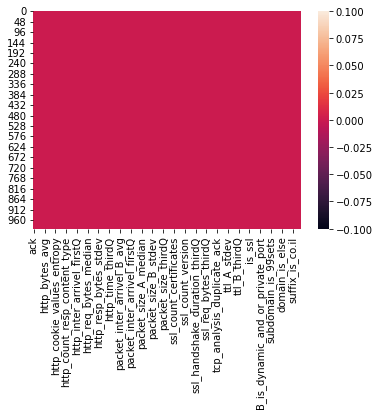

In [22]:
sns.heatmap(dx.isnull())

<AxesSubplot:xlabel='device_category', ylabel='count'>

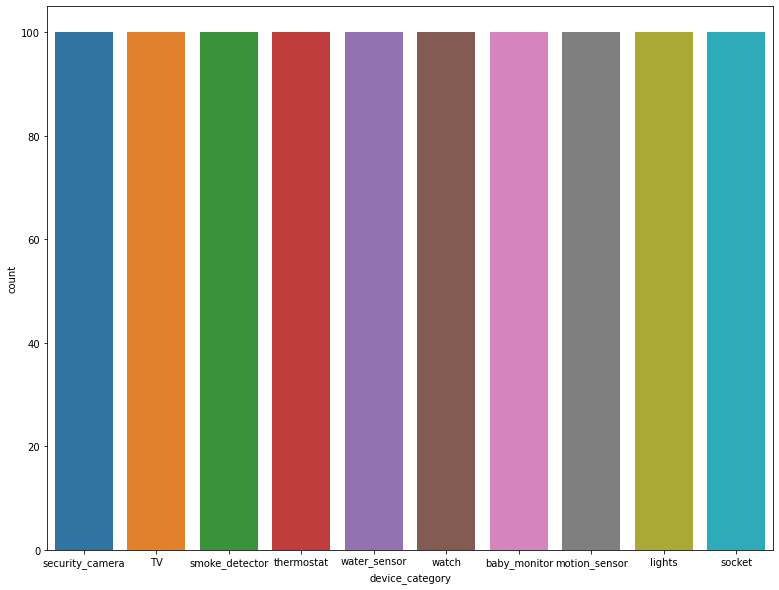

In [113]:
plt.figure(figsize=(13,10))
sns.countplot(data=dx,x='device_category')


In [119]:
X = dx.drop('device_category',axis=1)
y = dx['device_category']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rand_tree = RandomForestClassifier(n_estimators=300)

In [124]:
rand_tree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [125]:
pred = rand_tree.predict(X_test)

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

             TV       0.90      0.93      0.91        40
   baby_monitor       1.00      0.88      0.93        32
         lights       0.59      0.51      0.55        37
  motion_sensor       0.92      0.92      0.92        26
security_camera       1.00      0.96      0.98        24
 smoke_detector       1.00      0.96      0.98        28
         socket       0.42      0.47      0.44        30
     thermostat       1.00      0.93      0.96        29
          watch       0.79      0.96      0.87        24
   water_sensor       0.53      0.60      0.56        30

       accuracy                           0.80       300
      macro avg       0.82      0.81      0.81       300
   weighted avg       0.81      0.80      0.80       300



In [133]:
les = [df,dx]

q = pd.concat(les,ignore_index=True)



<AxesSubplot:>

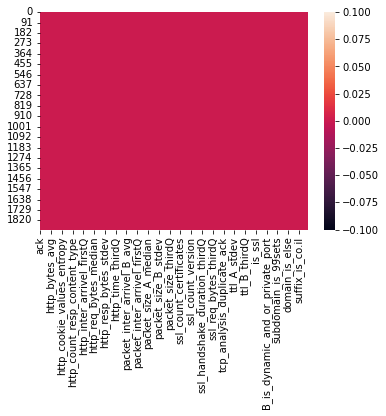

In [134]:
sns.heatmap(q.isnull())

In [135]:
q

,ack,ack_A,ack_B,bytes,bytes_A,bytes_A_B_ratio,bytes_B,ds_field_A,ds_field_B,duration,...,suffix_is_co.il,suffix_is_com,suffix_is_com.sg,suffix_is_else,suffix_is_empty_char_value,suffix_is_googleapis.com,suffix_is_net,suffix_is_org,suffix_is_unresolved,device_category
0,38,20,18,14698,7814,1.135096,6884,0,0,1.9156,...,0,0,0,1,0,0,0,0,0,baby_monitor
1,38,20,18,14698,7814,1.135096,6884,0,0,2.0020,...,0,0,0,1,0,0,0,0,0,baby_monitor
2,38,20,18,14762,7814,1.124640,6948,0,0,2.1833,...,0,0,0,1,0,0,0,0,0,baby_monitor
3,38,20,18,14762,7814,1.124640,6948,0,0,2.1521,...,0,0,0,1,0,0,0,0,0,baby_monitor
4,41,20,21,14862,7994,1.163949,6868,0,0,2.2422,...,0,0,0,1,0,0,0,0,0,baby_monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,0,0,240,0,0.000000,240,0,64,1.4983,...,0,0,0,1,0,0,0,0,0,socket
1896,0,0,0,240,0,0.000000,240,0,64,1.4979,...,0,0,0,1,0,0,0,0,0,socket
1897,0,0,0,240,0,0.000000,240,0,64,1.4950,...,0,0,0,1,0,0,0,0,0,socket
1898,0,0,0,240,0,0.000000,240,0,64,1.4993,...,0,0,0,1,0,0,0,0,0,socket


In [136]:
X = q.drop('device_category',axis=1)
y = q['device_category']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [138]:
rand = RandomForestClassifier(n_estimators=300)

In [139]:
rand.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [140]:
predi = rand_tree.predict(X_test)

In [141]:
print(classification_report(y_test,predi))

                 precision    recall  f1-score   support

             TV       0.74      0.89      0.81        61
   baby_monitor       1.00      0.91      0.95        56
         lights       0.82      0.61      0.70        69
  motion_sensor       0.80      0.86      0.83        51
security_camera       0.98      0.73      0.83        66
 smoke_detector       1.00      0.98      0.99        52
         socket       0.66      0.61      0.63        54
     thermostat       0.97      0.89      0.93        65
          watch       0.70      0.85      0.77        59
   water_sensor       0.58      0.92      0.71        37

       accuracy                           0.82       570
      macro avg       0.83      0.82      0.82       570
   weighted avg       0.84      0.82      0.82       570



In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier(n_neighbors=1)

In [144]:
X = q.drop('device_category',axis=1)
y = q['device_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [145]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [146]:
p = knn.predict(X_test)

In [148]:
print(classification_report(y_test,p))

                 precision    recall  f1-score   support

             TV       0.83      0.90      0.87        61
   baby_monitor       0.93      0.89      0.91        56
         lights       0.73      0.12      0.20        69
  motion_sensor       0.89      0.96      0.92        51
security_camera       0.91      0.95      0.93        66
 smoke_detector       1.00      0.98      0.99        52
         socket       0.34      0.91      0.50        54
     thermostat       0.97      0.89      0.93        65
          watch       0.85      0.76      0.80        59
   water_sensor       0.75      0.16      0.27        37

       accuracy                           0.76       570
      macro avg       0.82      0.75      0.73       570
   weighted avg       0.82      0.76      0.74       570

